In [41]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC


### Load the Iris Dataset

In [42]:
# Load the Iris Dataset
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['species'] = iris.target
iris_data['species'] = iris_data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows of the dataset
iris_data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### EDA

In [43]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [44]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


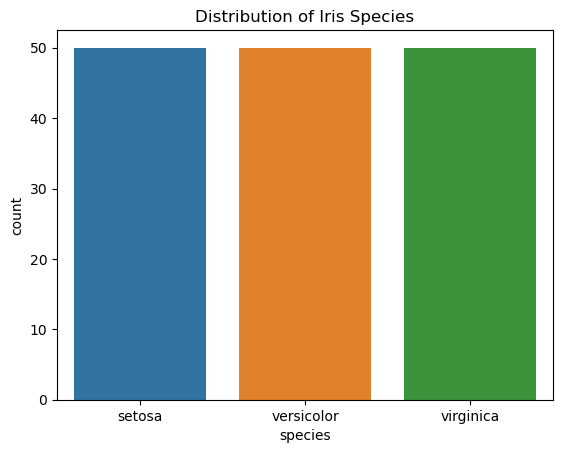

In [45]:

sns.countplot(x='species', data=iris_data)
plt.title('Distribution of Iris Species')
plt.show()



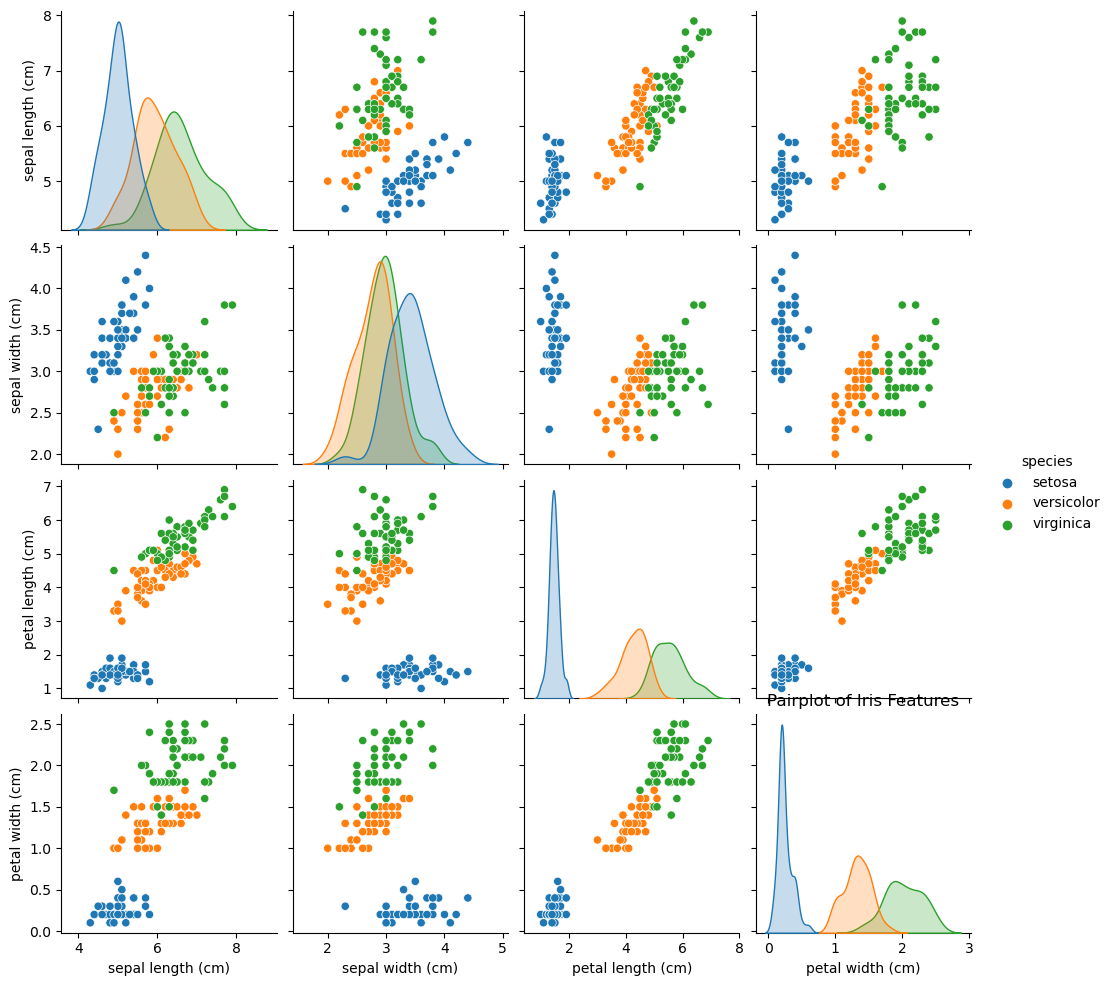

In [46]:
#Pairplot for visualizing relationships
sns.pairplot(iris_data, hue='species')
plt.title('Pairplot of Iris Features')
plt.show()

### Split the Data

In [47]:
# Split the Data
X = iris_data.drop('species', axis=1)
y = iris_data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Standardize the Features

In [48]:
# Standardize the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Random Forest Classifier

In [49]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)



In [50]:
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")



Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV Score: 0.9666666666666668


In [51]:
# Train the Random Forest Model
rf_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Model
print("Random Forest Classification Report:\n\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



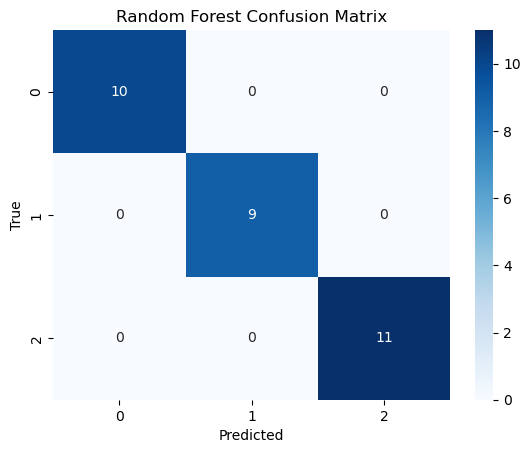

In [52]:

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Support Vector Classifier (SVC)

In [53]:
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [54]:
y_pred_svc = svc_model.predict(X_test_scaled)


In [55]:
print("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))


SVC Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



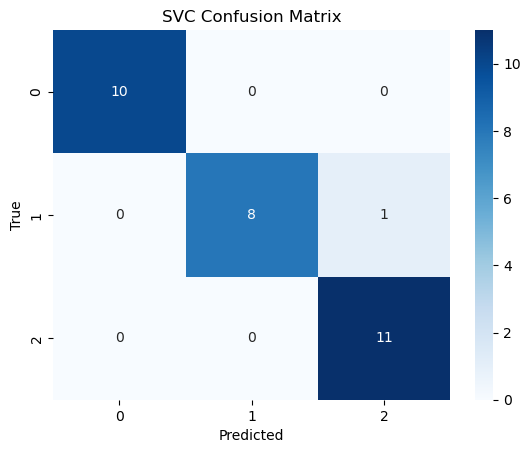

In [56]:
# Confusion Matrix for SVC
cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Model Accuracy Evaluation

In [57]:
train_accuracy_rf = rf_model.score(X_train_scaled, y_train)
print(f"Random Forest Training Accuracy: {train_accuracy_rf:.2f}")
test_accuracy_rf = rf_model.score(X_test_scaled, y_test)
print(f"Random Forest Test Accuracy: {test_accuracy_rf:.2f}")
train_accuracy_svc = svc_model.score(X_train_scaled, y_train)
print(f"SVC Training Accuracy: {train_accuracy_svc:.2f}")
test_accuracy_svc = svc_model.score(X_test_scaled, y_test)
print(f"SVC Test Accuracy: {test_accuracy_svc:.2f}")

Random Forest Training Accuracy: 1.00
Random Forest Test Accuracy: 1.00
SVC Training Accuracy: 0.98
SVC Test Accuracy: 0.97


In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
# Download and load the dataset
import kagglehub

# Download dataset
kagglehub.dataset_download("ashydv/advertising-dataset")

# Define path and load data
csv_file_path = 'C:\\Users\\hp\\.cache\\kagglehub\\datasets\\ashydv\\advertising-dataset\\versions\\1\\advertising.csv'
df = pd.read_csv(csv_file_path)
df.head()
# Basic exploration
print(df.describe(),'\n\n')
print(df.dtypes,'\n\n')
print(df.isnull().sum(),'\n\n')
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

#  Shapiro-Wilk test for normality on numeric columns
results = {}
for column in df.select_dtypes(include=[np.number]).columns:
    statistic, p_value = shapiro(df[column])
    results[column] = {
        'Shapiro-Wilk Test Statistic': statistic,
        'P-value': p_value,
        'Normality': 'Fail to reject the null hypothesis: Data is normally distributed' if p_value > 0.05 else 'Reject the null hypothesis: Data is not normally distributed'
    }

# Print results
for column, result in results.items():
    print(f"Column: {column}")
    print(f"  Shapiro-Wilk Test Statistic: {result['Shapiro-Wilk Test Statistic']}")
    print(f"  P-value: {result['P-value']}")
    print(f"  Interpretation: {result['Normality']}\n")
#  Scale features
from sklearn.preprocessing import MinMaxScaler

# Scale the predictors
scaler = MinMaxScaler()
df[['TV_scaled', 'Radio_scaled', 'Newspaper_scaled']] = scaler.fit_transform(df[['TV', 'Radio', 'Newspaper']])
# Split data and add constant for OLS model
X = sm.add_constant(df[['TV_scaled', 'Radio_scaled', 'Newspaper_scaled']])
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Build and summarize the OLS model
ols_model = sm.OLS(y_train, X_train)
model_results = ols_model.fit()
print(model_results.summary())
#Calculate VIF to check for multicollinearity
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)
#  Predictions on training and test sets
ols_pred_train = model_results.predict(X_train)
ols_pred_test = model_results.predict(X_test)
# Calculate MSE and MAPE for train and test sets
mean_squared_train = mean_squared_error(y_train, ols_pred_train)
mean_squared_test = mean_squared_error(y_test, ols_pred_test)
mape_train = mean_absolute_percentage_error(y_train, ols_pred_train)
mape_test = mean_absolute_percentage_error(y_test, ols_pred_test)

print(f'MSE for train: {mean_squared_train}')
print(f'MSE for test: {mean_squared_test}')
print(f'MAPE for train: {mape_train}')
print(f'MAPE for test: {mape_test}')
# Residual vs Fitted Values Plot
plt.figure(figsize=(8, 6))
plt.scatter(model_results.fittedvalues, model_results.resid, edgecolor="black", alpha=0.5)
plt.grid()
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted")
plt.show()
# Q-Q Plot for residuals
sm.qqplot(model_results.resid, line='s')
plt.title("Q-Q Plot")
plt.show()
